# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import gdown

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Understanding

In [3]:
FILE_ID = '11mhE9oRfJ_qUlF18vNCyoc8G9zTJZtwz'
url = f"https://drive.google.com/uc?id={FILE_ID}"

output = 'anime.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11mhE9oRfJ_qUlF18vNCyoc8G9zTJZtwz
To: /content/anime.csv
100%|██████████| 936k/936k [00:00<00:00, 139MB/s]


'anime.csv'

In [4]:
FILE_ID = '1sH7BIzX0GLaZozq5T6etjtLlpk1WFDBJ'
url = f"https://drive.google.com/uc?id={FILE_ID}"
output = 'rating.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1sH7BIzX0GLaZozq5T6etjtLlpk1WFDBJ
From (redirected): https://drive.google.com/uc?id=1sH7BIzX0GLaZozq5T6etjtLlpk1WFDBJ&confirm=t&uuid=70a278b9-f2ab-4975-a767-a4de4bd1ae6a
To: /content/rating.csv
100%|██████████| 111M/111M [00:02<00:00, 46.8MB/s]


'rating.csv'

In [5]:
anime = pd.read_csv('anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
rating = pd.read_csv('rating.csv')
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [ ]:
print('Jumlah data rating oleh user: ', len(rating.user_id.unique()))
print('Jumlah rating untuk anime: ', len(rating.anime_id.unique()))

Jumlah data rating oleh user:  73515
Jumlah rating untuk anime:  11200


# Exploratory Data Analysis

## Anime

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


### Distribusi Tipe Anime

In [ ]:
print('Jumlah data anime: ', len(anime.anime_id.unique()))
print('Tipe anime: ', anime.type.unique())

Jumlah data anime:  12294
Tipe anime:  ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


<ipython-input-10-2df42af251bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=anime, palette='Set2')


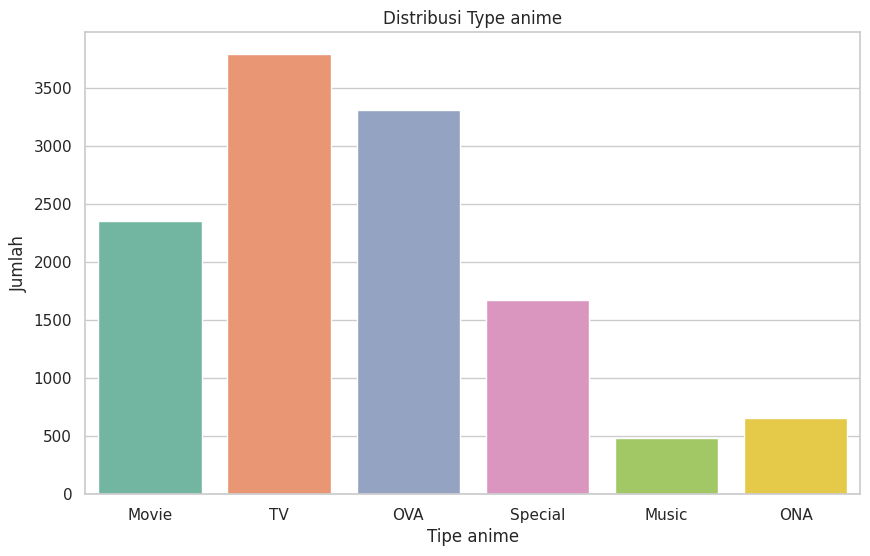

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

sns.countplot(x='type', data=anime, palette='Set2')
plt.title('Distribusi Type anime')
plt.xlabel('Tipe anime')
plt.ylabel('Jumlah')
plt.show()

### Genre Anime

In [ ]:
print('Jumlah genre anime: ', len(anime.genre.unique()))
print('Daftar Genre anime: ', anime.genre.unique())

Jumlah genre anime:  3265
Daftar Genre anime:  ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']


### Members Anime

In [ ]:
max_members = anime['members'].max()
min_members = anime['members'].min()

print('Jumlah member anime terbanyak:', max_members)
print('Jumlah member anime tersedikit:', min_members)


Jumlah member anime terbanyak: 1013917
Jumlah member anime tersedikit: 5


## Rating

In [ ]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
print('Jumlah Seluruh rating: ', len(rating.rating.unique()))
print('Nilai Rating: ', rating.rating.unique())

Jumlah Seluruh rating:  11
Nilai Rating:  [-1 10  8  6  9  7  3  5  4  1  2]


In [ ]:
print('Jumlah Seluruh User: ', len(rating.user_id.unique()))
print('Jumlah Seluruh Anime: ', len(rating.anime_id.unique()))
print('Jumlah Seluruh data rating: ', len(rating))

Jumlah Seluruh User:  73515
Jumlah Seluruh Anime:  11200
Jumlah Seluruh data rating:  7813737


# Data Preprocessing

## Menggabungkan Keseluruhan Data

In [ ]:
data = pd.merge(rating, anime, on='anime_id', how='left')
data

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297.0
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553.0
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772.0
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511.0
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395.0
...,...,...,...,...,...,...,...,...,...
7813732,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266.0
7813733,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747.0
7813734,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895.0
7813735,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005.0


## Menggabungkan Data Rating dengan Nama Anime

In [ ]:
data_anime = pd.merge(rating, anime[['anime_id', 'name']], on='anime_id', how='left')
data_anime

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
...,...,...,...,...
7813732,73515,16512,7,Devil Survivor 2 The Animation
7813733,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain
7813734,73515,22145,10,Kuroshitsuji: Book of Circus
7813735,73516,790,9,Ergo Proxy


## Menggabungkan Data dengan Genre Anime

In [ ]:
genre_anime = pd.merge(data_anime, anime[['anime_id', 'genre']], on='anime_id', how='left')
genre_anime

,user_id,anime_id,rating,name,genre
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen"
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R..."
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,..."
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School"
...,...,...,...,...,...
7813732,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural"
7813733,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi"
7813734,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ..."
7813735,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi"


# Data Preparation Content Based

In [ ]:
genre_anime.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


## Mengatasi nilai Rating -1

In [ ]:
before = len(genre_anime)
genre_anime = genre_anime[genre_anime['rating'] != -1]
after = len(genre_anime)
print(f"{before - after} baris dengan rating -1 telah dihapus.")


1476496 baris dengan rating -1 telah dihapus.


In [ ]:
print(f"{before - after} baris dengan rating -1 telah dihapus.")
print('Jumlah Seluruh rating: ', len(genre_anime.rating.unique()))
print('Nilai Rating: ', genre_anime.rating.unique())
print('Jumlah Seluruh Data: ', after)


1476496 baris dengan rating -1 telah dihapus.
Jumlah Seluruh rating:  10
Nilai Rating:  [10  8  6  9  7  3  5  4  1  2]
Jumlah Seluruh Data:  6337241


## Mengatasi Missing Values

In [ ]:
genre_anime.isnull().sum()

,0
user_id,0
anime_id,0
rating,0
name,2
genre,90


In [ ]:
genre_anime = genre_anime.dropna()
genre_anime.isnull().sum()

,0
user_id,0
anime_id,0
rating,0
name,0
genre,0


## Menangani koma dalam fitur genre



In [ ]:
genre_anime.head()

,user_id,anime_id,rating,name,genre
47,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural"
81,1,11617,10,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School"
83,1,11757,10,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance"
101,1,15451,10,High School DxD New,"Action, Comedy, Demons, Ecchi, Harem, Romance,..."
153,2,11771,10,Kuroko no Basket,"Comedy, School, Shounen, Sports"


In [ ]:
genre_anime['genre'] = genre_anime['genre'].str.replace(', ', ' ')

In [ ]:
genre_anime.head()

,user_id,anime_id,rating,name,genre
47,1,8074,10,Highschool of the Dead,Action Ecchi Horror Supernatural
81,1,11617,10,High School DxD,Comedy Demons Ecchi Harem Romance School
83,1,11757,10,Sword Art Online,Action Adventure Fantasy Game Romance
101,1,15451,10,High School DxD New,Action Comedy Demons Ecchi Harem Romance School
153,2,11771,10,Kuroko no Basket,Comedy School Shounen Sports


## Menangani String Unik pada kolom name

In [ ]:
genre_anime['name'] = genre_anime['name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)  # hanya huruf, angka, dan spasi
genre_anime['name'] = genre_anime['name'].str.replace(r'\s+', ' ', regex=True)      # hilangkan spasi ganda
genre_anime['name'] = genre_anime['name'].str.strip()                               # hapus spasi di awal/akhir

## Menangani Duplikasi data

In [ ]:
genre_fix = genre_anime
genre_fix.sort_values('anime_id')

,user_id,anime_id,rating,name,genre
5679349,53305,1,8,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space
3043772,28209,1,10,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space
6834416,63373,1,5,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space
5944966,55537,1,7,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space
7080958,66074,1,10,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space
...,...,...,...,...,...
4987580,47765,34367,6,Long Riders Recap,Comedy Shounen Slice of Life Sports
3316425,30565,34367,6,Long Riders Recap,Comedy Shounen Slice of Life Sports
1456909,13954,34475,6,Monster Strike Rain of Memories,Action Fantasy Game
5704639,53492,34475,5,Monster Strike Rain of Memories,Action Fantasy Game


In [ ]:
genre_fix = genre_fix.drop_duplicates('anime_id')
genre_fix

,user_id,anime_id,rating,name,genre
47,1,8074,10,Highschool of the Dead,Action Ecchi Horror Supernatural
81,1,11617,10,High School DxD,Comedy Demons Ecchi Harem Romance School
83,1,11757,10,Sword Art Online,Action Adventure Fantasy Game Romance
101,1,15451,10,High School DxD New,Action Comedy Demons Ecchi Harem Romance School
153,2,11771,10,Kuroko no Basket,Comedy School Shounen Sports
...,...,...,...,...,...
7484964,69964,23585,7,Haha wo Tazunete Sanzenri Specials,Adventure Drama Slice of Life
7485221,69964,33659,6,Fushigi na Somerachan Special,Comedy Magic Slice of Life
7736697,72800,30738,4,Gamba Gamba to Nakamatachi,Adventure Kids
7769206,73135,8723,5,Anime Rakugo Kan,Comedy


## Membuat Dataframe untuk model Content-Based

In [ ]:
anime_id = genre_fix['anime_id'].tolist()
anime_name = genre_fix['name'].tolist()
anime_genre = genre_fix['genre'].tolist()

print(len(anime_id))
print(len(anime_name))
print(len(anime_genre))

9894
9894
9894


In [ ]:
preparation = pd.DataFrame({
    'id': anime_id,
    'name': anime_name,
    'genre': anime_genre
})
preparation

,id,name,genre
0,8074,Highschool of the Dead,Action Ecchi Horror Supernatural
1,11617,High School DxD,Comedy Demons Ecchi Harem Romance School
2,11757,Sword Art Online,Action Adventure Fantasy Game Romance
3,15451,High School DxD New,Action Comedy Demons Ecchi Harem Romance School
4,11771,Kuroko no Basket,Comedy School Shounen Sports
...,...,...,...
9889,23585,Haha wo Tazunete Sanzenri Specials,Adventure Drama Slice of Life
9890,33659,Fushigi na Somerachan Special,Comedy Magic Slice of Life
9891,30738,Gamba Gamba to Nakamatachi,Adventure Kids
9892,8723,Anime Rakugo Kan,Comedy


# Data Preparation Collaborative

In [ ]:
data_rating = rating
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## Encode user_id

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = data_rating['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

Output hidden; open in https://colab.research.google.com to view.

## Encode anime_id

In [ ]:
anime_ids = data_rating['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [ ]:
# Mapping userID ke dataframe user
data_rating['user'] = data_rating['user_id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
data_rating['anime'] = data_rating['anime_id'].map(anime_to_anime_encoded)

# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_anime = len(anime_encoded_to_anime)
print(num_anime)

# Mengubah rating menjadi nilai float
data_rating['rating'] = data_rating['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data_rating['rating'])

# Nilai maksimal rating
max_rating = max(data_rating['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

73515
11200
Number of User: 73515, Number of Resto: 11200, Min Rating: -1.0, Max Rating: 10.0


## Menangani Rating -1

In [ ]:
before = len(data_rating)
data_rating = data_rating[data_rating['rating'] != -1]
after = len(data_rating)
print(f"{before - after} baris dengan rating -1 telah dihapus.")
print('Jumlah Seluruh rating: ', len(data_rating.rating.unique()))
print('Nilai Rating: ', data_rating.rating.unique())
print('Jumlah Seluruh Data: ', after)

1476496 baris dengan rating -1 telah dihapus.
Jumlah Seluruh rating:  10
Nilai Rating:  [10.  8.  6.  9.  7.  3.  5.  4.  1.  2.]
Jumlah Seluruh Data:  6337241


## Data Splitting

In [ ]:
# Mengacak dataset
data_rating = data_rating.sample(frac=1, random_state=42)
data_rating.sample(5)

,user_id,anime_id,rating,user,anime
606139,5892,901,8.0,5891,1401
5632988,52884,28701,9.0,52882,224
1046493,10072,1689,7.0,10071,173
3794174,35455,5,10.0,35454,881
125987,1281,1120,9.0,1280,2083


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = data_rating[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = data_rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[53101    38]
 [32883   632]
 [24906   218]
 ...
 [57106  3391]
 [50460     3]
 [20216  1156]] [0.72727273 0.81818182 0.90909091 ... 0.72727273 0.90909091 0.45454545]


# Content Based Filtering

In [ ]:
data = preparation
data.head(10)

,id,name,genre
0,8074,Highschool of the Dead,Action Ecchi Horror Supernatural
1,11617,High School DxD,Comedy Demons Ecchi Harem Romance School
2,11757,Sword Art Online,Action Adventure Fantasy Game Romance
3,15451,High School DxD New,Action Comedy Demons Ecchi Harem Romance School
4,11771,Kuroko no Basket,Comedy School Shounen Sports
5,20,Naruto,Action Comedy Martial Arts Shounen Super Power
6,154,Shaman King,Action Adventure Comedy Drama Shounen Supernat...
7,170,Slam Dunk,Comedy Drama School Shounen Sports
8,199,Sen to Chihiro no Kamikakushi,Adventure Drama Supernatural
9,225,Dragon Ball GT,Action Adventure Comedy Fantasy Magic Sci-Fi S...


## TF-IDF Vectorizer

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(data['genre'])
tfidf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [ ]:
tfidf_matrix = tfidf.fit_transform(data['genre'])
tfidf_matrix.shape

(9894, 47)

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=data.name
).sample(20, axis=1).sample(10, axis=0)

,psychological,samurai,school,ecchi,magic,ai,arts,supernatural,yaoi,of,sports,sci,military,yuri,super,fantasy,shoujo,harem,drama,vampire
name,,,,,,,,,,,,,,,,,,,,
Sakura Nagashi,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.367907,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.385372,0.0
Soukyuu no Fafner Dead Aggressor Exodus,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.352575,0.55687,0.0,0.0,0.000000,0.0,0.000000,0.369313,0.0
Chiisana Jumbo,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.467899,0.0,0.000000,0.000000,0.0
Magi Sinbad no Bouken TV,0.0,0.0,0.000000,0.0,0.572918,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.417238,0.0,0.000000,0.000000,0.0
DC Da Capo,0.0,0.0,0.000000,0.0,0.518236,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.632558,0.394223,0.0
Ashita no Yukinojou,0.0,0.0,0.470508,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.606494,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
Monster Musume no Iru Nichijou Hobo Mainichi Namappoi Douga,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.54636,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
Seitokai no Ichizon,0.0,0.0,0.439287,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.612034,0.000000,0.0
Suzume no Oyado,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0


## Cosine Similarity

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.22765689, 0.10594831, ..., 0.        , 0.        ,
        0.        ],
       [0.22765689, 1.        , 0.13376136, ..., 0.        , 0.2210714 ,
        0.2210714 ],
       [0.10594831, 0.13376136, 1.        , ..., 0.20981725, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.20981725, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.2210714 , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.2210714 , 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9894, 9894)


name,Fuyu no Semi Tokubetsu Henshuuhan,PuriGorota Uchuu no Yuujou Daibouken,Wake Up Girl Zoo Miyagi PR de Go,Haiyore Nyarukosan W OVA,Zoids
name,,,,,
Tsubasa Shunraiki,0.133523,0.127860,0.000000,0.000000,0.206981
Vie Durant,0.097969,0.334943,0.000000,0.000000,0.297906
GaRei Zero,0.055959,0.000000,0.000000,0.000000,0.093350
Wana Hakudaku Mamire no Houkago,0.000000,0.000000,0.000000,0.000000,0.000000
Pokemon Mewtwo no Gyakushuu,0.186941,0.504036,0.296853,0.095011,0.379305
El Hazard 2 The Magnificent World,0.000000,0.280110,0.464499,0.148667,0.389207
Tottoko Hamtarou Hai,0.000000,0.758727,0.000000,0.000000,0.239673
RESTART POiNTER,0.000000,0.000000,0.000000,0.000000,0.000000
Oreca Battle,0.000000,0.000000,0.000000,0.000000,0.000000


## Mendapatkan Rekomendasi

### Rekomendasi Berdasarkan Genre

In [ ]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['name', 'genre']], k=5):
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_anime, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data.sample(20)

,id,name,genre
790,1562,Yamato Nadeshiko Shichihenge,Comedy Shoujo
8407,29647,Sensuikan Cassiopeia,Dementia
4206,11715,Kamisama Dolls Specials,Comedy
4003,1762,Arslan Senki,Action Adventure Drama Fantasy Historical
2639,1021,Kaikan Phrase,Drama Music Romance Shoujo
2564,18045,Koi to Senkyo to Chocolate Special,Drama Romance School
2026,3323,Kite Liberator,Action Drama Sci-Fi
4495,15843,Koiito Kinenbi The Animation,Hentai
1185,30658,Gakuen no Ikenie Nagusami Mono to Kashita Kyon...,Hentai
366,14685,OnegaiTeacher Reminiscence Disc,Comedy Romance Sci-Fi


In [ ]:
anime_recommendations('Ohisama to Kaeru')

,name,genre
0,Forestry,Comedy
1,Marie amp Gali Special,Comedy
2,Neko Ramen,Comedy
3,Barakamon Mijikamon,Comedy
4,Ketsuekigatakun,Comedy


# Collaborative Filtering

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings resto
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 1,
    validation_data = (x_val, y_val)
)

633724/633724 ━━━━━━━━━━━━━━━━━━━━ 2102s 3ms/step - loss: 0.4849 - root_mean_squared_error: 0.1229 - val_loss: 0.4758 - val_root_mean_squared_error: 0.1116


In [ ]:
data_rating.head()

,user_id,anime_id,rating,user,anime
5656992,53103,6707,7.0,53101,38
3552500,32884,339,8.0,32883,632
2636208,24907,23755,9.0,24906,218
5554182,52213,10156,7.0,52211,3173
95779,994,1562,10.0,993,874


In [ ]:
anime_df = preparation
data = pd.read_csv('rating.csv')

# Mengambil sample user
user_id = data.user_id.sample(1).iloc[0]
anime_watched_by_user = data[data.user_id == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
anime_not_watched = anime_df[~anime_df['id'].isin(anime_watched_by_user.anime_id.values)]['id']
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)


In [ ]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.name, ':', row.genre)

print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)

recommended_anime = anime_df[anime_df['id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.name, ':', row.genre)

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 8643
Anime with high ratings from user
--------------------------------
Naruto : Action Comedy Martial Arts Shounen Super Power
SteinsGate Movie Fuka Ryouiki no Dj vu : Sci-Fi Thriller
Mirai Nikki TV : Action Mystery Psychological Shounen Supernatural Thriller
Bakemonogatari : Mystery Romance Supernatural Vampire
Suzumiya Haruhi no Shoushitsu : Comedy Mystery Romance School Sci-Fi Supernatural
--------------------------------
Top 10 anime recommendation
--------------------------------
Fullmetal Alchemist Brotherhood : Action Adventure Drama Fantasy Magic Military Shounen
Gintama : Action Comedy Historical Parody Samurai Sci-Fi Shounen
Gintama039 : Action Comedy Historical Parody Samurai Sci-Fi Shounen
Gintama Movie Kanketsuhen Yorozuya yo Eien Nare : Action Comedy Historical Parody Samurai Sci-Fi Shounen
Gintama039 Enchousen : Action Comedy Historical Parody Samurai Sci-Fi Shounen
Hunter x Hunter 2011 : Action